## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize ##scipy optimize
import csv
import time  
#import or_gym
#from or_gym.utils import create_env
import ray
import ray.rllib.agents.ppo as ppo
from ray import tune
from datetime import datetime
sns.set_style("darkgrid")
sns.set_palette("rainbow")
sns.set_context("talk")

In [ ]:
import SupplyChain_gym

In [ ]:
from ray.tune.registry import register_env

In [ ]:
from SupplyChain_gym.envs.InventoryEnvFile import InventoryEnv
from SupplyChain_gym.envs.NetworkManagementFile import NetInvMgmtMasterEnv
from SupplyChain_gym.envs.NetworkManagementFile import NetInvMgmtBacklogEnv as backlog_env
from SupplyChain_gym.envs.NetworkManagementFile import NetInvMgmtLostSalesEnv as lost_sales_env

In [ ]:
# from SupplyChain_gym.envs.InventoryManagementFile import InvManagementMasterEnv
# from SupplyChain_gym.envs.InventoryManagementFile import InvManagementBacklogEnv as env1
# from SupplyChain_gym.envs.InventoryManagementFile import InvManagementLostSalesEnv

In [ ]:
from scipy.optimize import minimize

In [ ]:
from gym import spaces

In [ ]:
import os
import math
import random

In [ ]:
from matplotlib import gridspec
import networkx as nx

## Supply Chain Environment CBC

### init should initialize all the variables atleast these for now
    self.INV[0, i] --inventory
    self.T 
    self.in_transit[0, i, j] --intransit inventory
    self.O[0, i, j] --orders
    self.BO[0, j, i]  --Backorders
    
    check supplychainenv file from supply_chain_RL folder __init__ folder 

### CID should actually return next state after all the variables are done 
    check supplychainenv file from supply_chain_RL folderin step function

### reset should reset the state at the bginning of the environment initialize and return the reset state
    should equal to state dimension
    check supplychainenv file from supply_chain_RL folderin reset function
    Also check environment.py from SCM-RL folder in SimpleSupplyChain-->reset function

### Step function should return next state too 
    check supplychainenv file from supply_chain_RL folder in step function
    Also check environment.py from SCM-RL folder in SimpleSupplyChain-->step function

### Pass one class in another 
    example in environment.py from SCM-RL/SB3 folder in SimpleSupplyChain-->step function
    Check step 2 notebook for predictting action

### Declare Classes

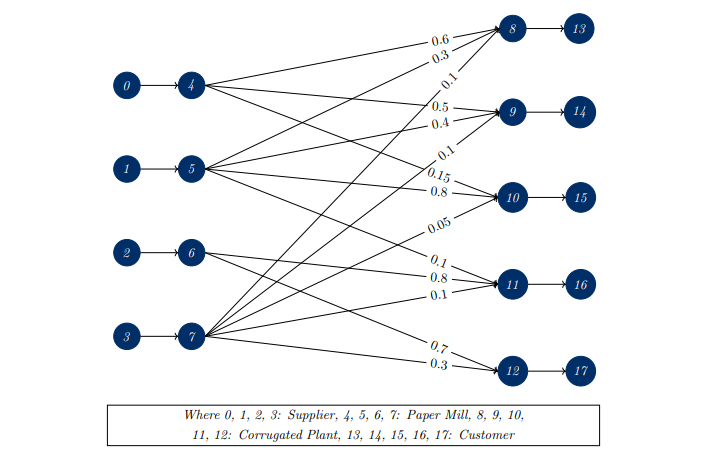

## Testing

### General parameters

In [ ]:
stockpoints_echelon = [4, 4, 5, 5]
# Number of suppliers
no_suppliers = stockpoints_echelon[0]
# Number of customers
no_customers = stockpoints_echelon[-1]
# Number of stockpoints
no_stockpoints = sum(stockpoints_echelon) - no_suppliers - no_customers
# Total number of nodes
no_nodes = sum(stockpoints_echelon)
# Total number of echelons, including supplier and customer
no_echelons = len(stockpoints_echelon)
demand_dist = 'poisson'
# Lower bound of the demand distribution
demand_lb = 15
#Upper bound of the demand distribution
demand_ub = 15
# Leadtime distribution, can only be 'uniform'
leadtime_dist = 'uniform'

In [ ]:
for i,j in enumerate(range(no_suppliers,no_nodes-no_customers)):
    print(state_high[2+i:2+i+1][0])

In [ ]:
i_list, j_list = np.nonzero(connections)
for i, j in zip(i_list[:-no_customers], j_list[:-no_customers]):
    print(i,j)

In [ ]:
connections = np.array([
        #0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 0
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 1
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 2
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 3
        [0, 0, 0, 0, 0, 0, 0, 0, 0.6, 0.5, 0.15, 0, 0, 0, 0, 0, 0, 0], # 4
        [0, 0, 0, 0, 0, 0, 0, 0, 0.3, 0.4, 0.80, 0.1, 0, 0, 0, 0, 0, 0], # 5
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.8, 0.7, 0, 0, 0, 0, 0], # 6
        [0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.05, 0.1, 0.3, 0, 0, 0, 0, 0], # 7
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 8
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], # 9
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], # 10
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], # 11
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], # 12
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 13
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 14
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 15
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 16
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # 17
        ])

In [ ]:
i_list, j_list = np.nonzero(connections)
j_list

In [ ]:
cnt=0
i_list, j_list = np.nonzero(connections)
for i, j in zip(i_list[:-no_customers], j_list[:-no_customers]):
        print(i,j)
        cnt+=1
print(cnt)

In [ ]:
i_list, j_list = np.nonzero(connections)
for i, j in zip(i_list[no_suppliers:no_suppliers+no_stockpoints],
                j_list[no_suppliers:no_suppliers+no_stockpoints]):
    print(i,j)

In [ ]:
# Loop over all suppliers and stockpoints
for i in range(0, no_stockpoints + no_suppliers):
# Loop over all stockpoints
# Note that only forward delivery is possible, hence 'i+1'
    for j in range(i + 1, no_stockpoints +no_suppliers):
        print(i,j)
           #delivery = self.T[0, i, j]
           #self.INV[0, j] += delivery
           #self.in_transit[0, i, j] = 0
           #self.T[0, i, j] = 0

### Testing with CBC class

In [ ]:
class General:
    """ Based on the case of the SC Company """

    def __init__(self):
        # Supply chain variables
        # Number of nodes per echelon, including suppliers and customers
        # The first element is the number of suppliers
        # The last element is the number of customers
        self.stockpoints_echelon = [4, 4, 5, 5]
        # Number of suppliers
        self.no_suppliers = self.stockpoints_echelon[0]
        # Number of customers
        self.no_customers = self.stockpoints_echelon[-1]
        # Number of stockpoints
        self.no_stockpoints = sum(self.stockpoints_echelon) - \
        self.no_suppliers - self.no_customers
        
        # Total number of nodes
        self.no_nodes = sum(self.stockpoints_echelon)
        # Total number of echelons, including supplier and customer
        self.no_echelons = len(self.stockpoints_echelon)
        # Connections between every stockpoint
        self.connections = np.array([
        #0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 0
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 1
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 2
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 3
        [0, 0, 0, 0, 0, 0, 0, 0, 0.6, 0.5, 0.15, 0, 0, 0, 0, 0, 0, 0], # 4
        [0, 0, 0, 0, 0, 0, 0, 0, 0.3, 0.4, 0.80, 0.1, 0, 0, 0, 0, 0, 0], # 5
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.8, 0.7, 0, 0, 0, 0, 0], # 6
        [0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.05, 0.1, 0.3, 0, 0, 0, 0, 0], # 7
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 8
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], # 9
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], # 10
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], # 11
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], # 12
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 13
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 14
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 15
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 16
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # 17
        ])
        # Determines what happens with unsatisfied demand, can be either 'backorders' or 'lost_sales'
        self.unsatisfied_demand = 'backorders'
        # Holding costs per stockpoint # for both warehouse and plants
        self.holding_costs = [0, 0, 0, 0, 0.6, 0.6, 0.6, 0.6, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
        # Backorder costs per stockpoint #only for WHs here
        self.bo_costs = [0, 0, 0, 0, 0, 0, 0, 0, 19, 19, 19, 19, 19, 0, 0, 0, 0, 0]
        # Demand distribution, can be either 'poisson' or 'uniform'
        self.demand_dist = 'poisson'
        # Lower bound of the demand distribution
        self.demand_lb = 100
        # Upper bound of the demand distribution
        self.demand_ub = 150
        # Leadtime distribution, can only be 'uniform'
        self.leadtime_dist = 'uniform'
        # Lower bound of the leadtime distribution
        
        self.leadtime_lb = 1
        # Upper bound of the leadtime distribution
        self.leadtime_ub = 1
        # Predetermined order policy, can be either 'X' or 'X+Y' or 'BaseStock'
        self.order_policy = 'X'
        self.horizon = 75
        self.warmup = 50
        self.divide = 1000
        self.action_low = np.array([-5,-5,-5,-5,-5,-5,-5,-5,-5]) #9
        self.action_high = np.array([5,5,5,5,5,5,5,5,5])         #9
        self.action_min = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])  #9 #first 4 from plants last 5 from WHs orderQty
        self.action_max = np.array([300, 300, 300, 300, 75, 75, 75, 75, 75]) #9 #first 4 from plants last 5 from WHs orderQty
        self.state_low = np.zeros(48)
        self.state_high = np.array([4500, 7750, # Total inventory and backorders
        500,500,500,500,500,500,500,500,500, # Inventory per stockpoint
        #11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, #per connection backorder
        500,500,500,500,500,500,500,500,500,500,500,500,500,500,150,150,150,150,150, #=7750
        #30, 31, 32, 33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
        150,150,150,150,75,75,75,75,75,75,75,75,75,75,75,75,75,75]) # Per connection Intransit Qty

In [ ]:
state_high = np.array([4500, 7750, # Total inventory and backorders
        500,500,500,500,500,500,500,500,500, # Inventory per stockpoint
        #11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, #per connection backorder
        500,500,500,500,500,500,500,500,500,500,500,500,500,500,150,150,150,150,150, #=7750
        #30, 31, 32, 33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
        150,150,150,150,75,75,75,75,75,75,75,75,75,75,75,75,75,75])
state_high[2:2+9]

In [ ]:
# PPO Settings
# activation function of network
network_activation = 'tanh'
# size of network
network_size = (64, 64)
# initial values of bias in network
network_bias_init = 0.0
# method of weight initialization for network (uniform or normal)
network_weights_init = 'uniform'
# number of iterations between evaluation
ppo_evaluation_steps = 500
#number of consecutive evaluation iterations without improvement
ppo_evaluation_threshold = 250
# maximum number of iterations in learning run
ppo_iterations = 50000
# length of one episode in buffer
ppo_buffer_length = 256
# discount factor used in GAE calculations
ppo_gamma = 0.99
# lambda rate used in GAE calculations
ppo_lambda = 0.95
# indicator of using a cooldown period in the buffer (boolean)
cooldown_buffer = False
# clipping value used in policy loss calculations
ppo_epsilon = 0.2
# learning rate for policy network
pi_lr = 1e-4
# learning rate for value network
vf_lr = 1e-4
# after x iterations, save model weights and histograms to tensorboard
ppo_save_freq = 500
# nr of epochs (i.e. repetitions of the buffer) used in updating the model weights
ppo_epochs = 10
# batch size used to split the buffer for updating the model weights
ppo_batch_size = 64
# number of simulation runs to compute benchmark and as stopping criterion
ppo_simulation_runs = 100
# length of simulation to compute benchmark and as stopping criterion
ppo_simulation_length = 75#horizon
# length of initial simulation that is discarded
ppo_warmup_period = 50#warmup
policy_results_states = [[0,12,12,12,12]] #dont know about this

In [ ]:
# for k in range(1):
#     print("Replication " + str(k))
#     # Initialize environment
#     env = InventoryEnv(case, case.action_low, case.action_high,
#                        case.action_min, case.action_max, case.state_low, case.state_high,
#                        'DRL', fix=True)
#     run_name = "RN{}".format(k)
#     # set random seed
#     #set_seeds(env, k)
#     # call learning function
#     ppo_learning(env, False, experiment_name, run_name,
#                  network_activation, network_size, network_bias_init, network_weights_init,
#                  ppo_evaluation_steps, ppo_evaluation_threshold,
#                  ppo_iterations, ppo_buffer_length, ppo_gamma, ppo_lambda, cooldown_buffer,
#                  ppo_epsilon, pi_lr, vf_lr, ppo_save_freq, ppo_epochs, ppo_batch_size,
#                  ppo_simulation_runs, ppo_simulation_length, ppo_warmup_period, policy_results_states)

In [ ]:
case=General()

In [ ]:
ray.shutdown()
ray.init(ignore_reinit_error=True,local_mode=True)

In [ ]:
import shutil

CHECKPOINT_ROOT = r"C:\Users\kishore.kukreja\Desktop\Inventory Policy Two Echelon\multi-echelon-RL\SCenvCheckPoint"
shutil.rmtree(CHECKPOINT_ROOT, ignore_errors=True, onerror=None)
ray_results = os.getcwd() + "/ray_results/"
shutil.rmtree(ray_results, ignore_errors=True, onerror=None)

In [ ]:
config = ppo.DEFAULT_CONFIG.copy()
config
config["log_level"] = "DEBUG"

In [ ]:
config

In [ ]:
select_env = "SupplyChainEnv-v0" #NetworkManagement-v1 #NetworkManagement-v2 #SupplyChainEnv-v0

In [ ]:
register_env(select_env, lambda x: InventoryEnv(case, case.action_low, case.action_high,
                       case.action_min, case.action_max, case.state_low, case.state_high,
                       'DRL', fix=True))

In [ ]:
agent = ppo.PPOTrainer(config, env=select_env)

In [ ]:
CHECKPOINT_ROOT=r'C:\Users\kishore.kukreja\Desktop\Inventory Policy Two Echelon\multi-echelon-RL\model\supplychainv0'

In [ ]:
N_ITER=1
results=[]
for n in range(N_ITER):
    result = agent.train()
    results.append(result)
    file_name = agent.save(CHECKPOINT_ROOT)
    print(file_name)
    print(result)

In [ ]:
# Unpack values from each iteration
rewards = np.hstack([i['hist_stats']['episode_reward'] 
    for i in results])

In [ ]:
p = 100
mean_rewards = np.array([np.mean(rewards[i-p:i+1]) 
                if i >= p else np.mean(rewards[:i+1]) 
                for i, _ in enumerate(rewards)])
std_rewards = np.array([np.std(rewards[i-p:i+1])
               if i >= p else np.std(rewards[:i+1])
               for i, _ in enumerate(rewards)])

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(20, 10))
gs = fig.add_gridspec(2, 4)
ax0 = fig.add_subplot(gs[:, :-2])
ax0.fill_between(np.arange(len(mean_rewards)), 
                 mean_rewards - std_rewards, 
                 mean_rewards + std_rewards, 
                 label='Standard Deviation', alpha=0.3)
ax0.plot(mean_rewards, label='Mean Rewards')
ax0.set_ylabel('Rewards')
ax0.set_xlabel('Episode')
ax0.set_title('Training Rewards')
ax0.legend()

## NetworkManagement with default parameters

### Running with ray

In [ ]:
CHECKPOINT_ROOT = r"C:\Users\kishore.kukreja\Desktop\Inventory Policy Two Echelon\multi-echelon-RL\model\networkmanagementv1\default"

In [ ]:
ray.shutdown()
ray.init(ignore_reinit_error=True,local_mode=True)

In [ ]:
import os
import shutil
if not os.path.exists(CHECKPOINT_ROOT):
    os.makedirs(CHECKPOINT_ROOT)

In [ ]:
# shutil.rmtree(CHECKPOINT_ROOT, ignore_errors=True, onerror=None)
# ray_results = os.getcwd() + "/ray_results/"
# shutil.rmtree(ray_results, ignore_errors=True, onerror=None)

In [ ]:
config = ppo.DEFAULT_CONFIG.copy()
config
config["log_level"] = "DEBUG"

In [ ]:
# def register_env(env_name):
#     env = create_env(env_name)
#     tune.register_env(env_name, 
#         lambda env_name: env(env_name))

In [ ]:
# env_name = 'SupplyChainEnv-v0'
# # Register environment
# register_env(env_name)

In [ ]:
# env = InventoryEnv(case, case.action_low, case.action_high,
#                        case.action_min, case.action_max, case.state_low, case.state_high,
#                        'DRL', fix=True)

In [ ]:
select_env = "NetworkManagement-v1" #NetworkManagement-v1 #NetworkManagement-v2 #SupplyChainEnv-v0

In [ ]:
# register_env(select_env, lambda config: InventoryEnv(case, case.action_low, case.action_high,
#                        case.action_min, case.action_max, case.state_low, case.state_high,
#                        'DRL', fix=True))

In [ ]:
case=NetInvMgmtMasterEnv()

In [ ]:
register_env(select_env,lambda config :env(case))

In [ ]:
agent = ppo.PPOTrainer(config, env=select_env)

In [ ]:
# rl_config = dict(
#     env=env_name,
#     num_workers=2,
#     env_config=env_config,
#     model=dict(
#         vf_share_layers=False,
#         fcnet_activation='elu',
#         fcnet_hiddens=[256, 256]
#     ),
#     lr=1e-5
# )

In [ ]:
N_ITER = 2
#s = "{:3d} reward {:6.2f}/{:6.2f}/{:6.2f} len {:6.2f} saved {}"

In [ ]:
results=[]
for n in range(N_ITER):
    result = agent.train()
    results.append(result)
    file_name = agent.save(CHECKPOINT_ROOT)
    print(file_name)
    print(result)

In [ ]:
# Unpack values from each iteration
rewards = np.hstack([i['hist_stats']['episode_reward'] 
    for i in results])
# pol_loss = [
#     i['info']['learner']['default_policy']['policy_loss'] 
#     for i in results]
# vf_loss = [
#     i['info']['learner']['default_policy']['vf_loss'] 
#     for i in results]

In [ ]:
p = 100
mean_rewards = np.array([np.mean(rewards[i-p:i+1]) 
                if i >= p else np.mean(rewards[:i+1]) 
                for i, _ in enumerate(rewards)])
std_rewards = np.array([np.std(rewards[i-p:i+1])
               if i >= p else np.std(rewards[:i+1])
               for i, _ in enumerate(rewards)])

In [ ]:
mean_rewards,std_rewards

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(20, 10))
gs = fig.add_gridspec(2, 4)
ax0 = fig.add_subplot(gs[:, :-2])
ax0.fill_between(np.arange(len(mean_rewards)), 
                 mean_rewards - std_rewards, 
                 mean_rewards + std_rewards, 
                 label='Standard Deviation', alpha=0.3)
ax0.plot(mean_rewards, label='Mean Rewards')
ax0.set_ylabel('Rewards')
ax0.set_xlabel('Episode')
ax0.set_title('Training Rewards')
ax0.legend()

### Predict using checkpoint

In [ ]:
def newest(path):
    files = os.listdir(path)
    paths = [os.path.join(path, basename) for basename in files]
    return max(paths, key=os.path.getctime)

In [ ]:
import gym

In [ ]:
root=r'C:\Users\kishore.kukreja\Desktop\Inventory Policy Two Echelon\multi-echelon-RL\model'

In [ ]:
newest(root)

In [ ]:
chkpt_file=r'C:\Users\kishore.kukreja\Desktop\Inventory Policy Two Echelon\multi-echelon-RL\model\checkpoint_000002\checkpoint-2'
agent.restore(chkpt_file)

In [ ]:
env = gym.make(select_env)
state = env.reset()

In [ ]:
state

In [ ]:
sum_reward = 0
n_step = 20
reward_list=[]
for step in range(n_step):
    print('Step',step)
    action = agent.compute_action(state)
    state, reward, done, info = env.step(action)
    reward_list.append(reward)
    sum_reward += reward
    print('Step Reward',reward)
    print('Sum Reward',sum_reward)
    print('Next State',state)
    #env.render()
    if done == 1:
        print("cumulative reward", sum_reward)
        state = env.reset()
        sum_reward = 0

In [ ]:
print(f'Final Cumulative Reward:{sum_reward:.1f}')

In [ ]:
plt.figure(figsize=(18, 5))
plt.plot(reward_list)
plt.title('Step Wise Reward')
plt.show()

## Use Derivative Free Powell to Train Agent and Learn

### Powell Derivative free

In [ ]:
def base_stock_policy(policy, env):
    '''
    Implements a re-order up-to policy. This means that for
    each node in the network, if the inventory at that node 
    falls below the level denoted by the policy, we will 
    re-order inventory to bring it to the policy level.
    
    For example, policy at a node is 10, current inventory
    is 5: the action is to order 5 units.
    '''
    assert len(policy) == len(env.init_inv), (
        'Policy should match number of nodes in network' + 
        '({}, {}).'.format(
            len(policy), len(env.init_inv)))
    
    # Get echelon inventory levels
    if env.period == 0:
        inv_ech = np.cumsum(env.I[env.period] +
            env.T[env.period])
    else:
        inv_ech = np.cumsum(env.I[env.period] +
            env.T[env.period] - env.B[env.period-1, :-1])
        
    # Get unconstrained actions
    unc_actions = policy - inv_ech
    unc_actions = np.where(unc_actions>0, unc_actions, 0)
    
    # Ensure that actions can be fulfilled by checking 
    # constraints
    inv_const = np.hstack([env.I[env.period, 1:], np.Inf])
    actions = np.minimum(env.c,
                np.minimum(unc_actions, inv_const))
    return actions

In [ ]:
def dfo_func(policy, env, *args):
    '''
    Runs an episode based on current base-stock model 
    settings. This allows us to use our environment for the 
    DFO optimizer.
    '''
    env.reset() # Ensure env is fresh
    rewards = []
    done = False
    while not done:
        action = base_stock_policy(policy, env)
        state, reward, done, _ = env.step(action)
        rewards.append(reward)
        if done:
            break
            
    rewards = np.array(rewards)
    prob = env.demand_dist.pmf(env.D, **env.dist_param)
    
    # Return negative of expected profit
    return -1 / env.num_periods * np.sum(prob * rewards)

In [ ]:
def optimize_inventory_policy(env_name, fun,
    init_policy=None, env_config={}, method='Powell'):
    
    env = or_gym.make(env_name, env_config=env_config)
    
    if init_policy is None:
        init_policy = np.ones(env.num_stages-1)
        
    # Optimize policy
    out = minimize(fun=fun, x0=init_policy, args=env, 
        method=method)
    policy = out.x.copy()
    
    # Policy must be positive integer
    policy = np.round(np.maximum(policy, 0), 0).astype(int)
    
    return policy, out

In [ ]:
select_env='InvManagement-v2'

In [ ]:
policy, out = optimize_inventory_policy(select_env,
    dfo_func)
print("Re-order levels: {}".format(policy))
print("DFO Info:\n{}".format(out))

In [ ]:
env = or_gym.make(env_name, env_config=env_config)
eps = 1000
rewards = []
for i in range(eps):
    env.reset()
    reward = 0
    while True:
        action = base_stock_policy(policy, env)
        s, r, done, _ = env.step(action)
        reward += r
        if done:
            rewards.append(reward)
            break

## NetworkManagement with Input parameters

### Default Network

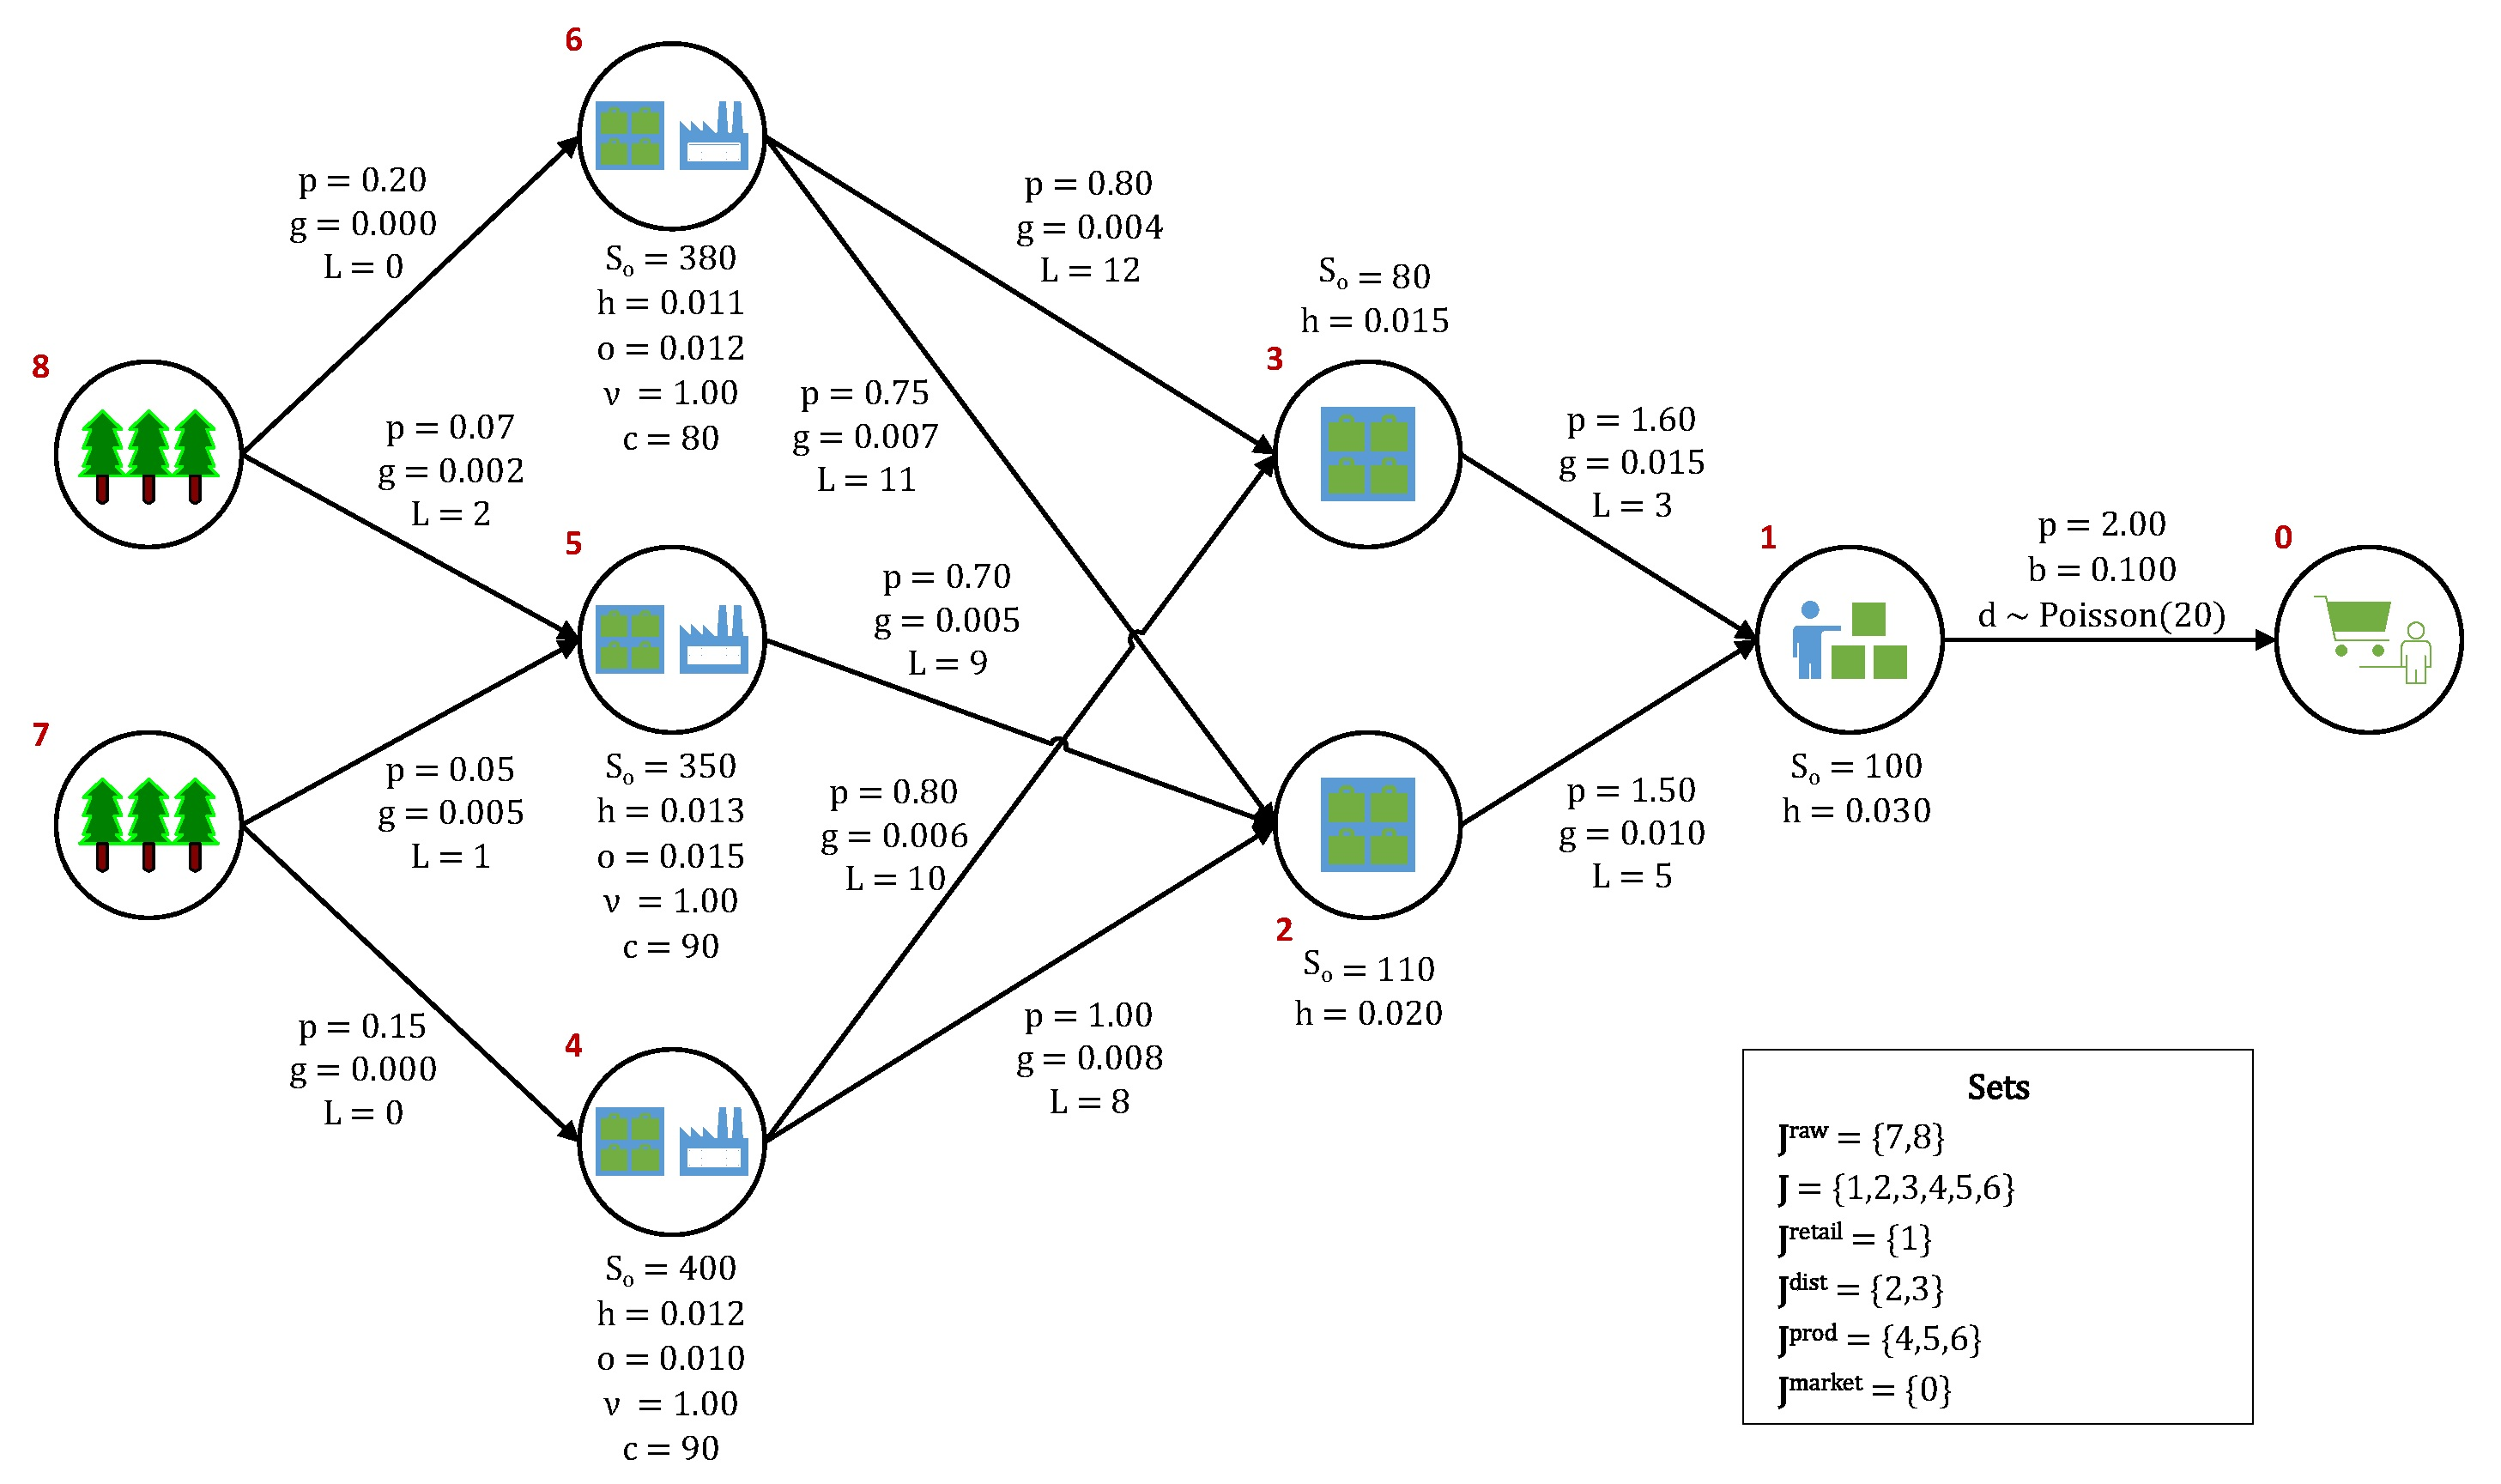

### Backlog - Back Orders

In [ ]:
from scipy.stats import poisson

In [ ]:
# create graph
graph = nx.DiGraph()
# Market 
graph.add_nodes_from([0])
# Retailer
graph.add_nodes_from([1], I0 = 100,
                                h = 0.030)
# Distributors
graph.add_nodes_from([2], I0 = 110,
                                h = 0.020)
graph.add_nodes_from([3], I0 = 80,
                                h = 0.015)
# Manufacturers
graph.add_nodes_from([4], I0 = 400,
                                C = 90,
                                o = 0.010,
                                v = 1.000,
                                h = 0.012)
graph.add_nodes_from([5], I0 = 350,
                                C = 90,
                                o = 0.015,
                                v = 1.000,
                                h = 0.013)
graph.add_nodes_from([6], I0 = 380,
                                C = 80,
                                o = 0.012,
                                v = 1.000,
                                h = 0.011)
# Raw materials
graph.add_nodes_from([7, 8])
# Links
graph.add_edges_from([(1,0,{'p': 2.000,
                                 'b': 0.100,
                                 'demand_dist': 'poisson',
                                 'dist_param': {'mu': 20}}),
                           (2,1,{'L': 5,
                                 'p': 1.500,
                                 'g': 0.010}),
                           (3,1,{'L': 3,
                                 'p': 1.600,
                                 'g': 0.015}),
                           (4,2,{'L': 8,
                                 'p': 1.000,
                                 'g': 0.008}),
                           (4,3,{'L': 10,
                                 'p': 0.800,
                                 'g': 0.006}),
                           (5,2,{'L': 9,
                                 'p': 0.700,
                                 'g': 0.005}),
                           (6,2,{'L': 11,
                                 'p': 0.750,
                                 'g': 0.007}),
                           (6,3,{'L': 12,
                                 'p': 0.800,
                                 'g': 0.004}),
                           (7,4,{'L': 0,
                                 'p': 0.150,
                                 'g': 0.000}),
                           (7,5,{'L': 1,
                                 'p': 0.050,
                                 'g': 0.005}),
                           (8,5,{'L': 2,
                                 'p': 0.070,
                                 'g': 0.002}),
                           (8,6,{'L': 0,
                                 'p': 0.200,
                                 'g': 0.000})])

In [ ]:
pos = nx.shell_layout(graph)
plt.figure(figsize=(8,8))
nx.draw(graph,pos,with_labels=True)

In [ ]:
_max_rewards = 2000
num_periods = 20
backlog = True
alpha = 1.00
seed_int = 0
user_D = {(1,0): np.zeros(num_periods)}
sample_path = {(1,0): False}
_max_rewards = 2000

In [ ]:
CHECKPOINT_ROOT = r"C:\Users\kishore.kukreja\Desktop\Inventory Policy Two Echelon\multi-echelon-RL\model\networkmanagementv1\userdefined\backorder"

In [ ]:
ray.shutdown()
ray.init(ignore_reinit_error=True,local_mode=True)

In [ ]:
import os
import shutil
if not os.path.exists(CHECKPOINT_ROOT):
    os.makedirs(CHECKPOINT_ROOT)

In [ ]:
config = ppo.DEFAULT_CONFIG.copy()
config
config["log_level"] = "DEBUG"

In [ ]:
select_env = "NetworkManagement-v1" #NetworkManagement-v1 #NetworkManagement-v2 #SupplyChainEnv-v0

In [ ]:
env_config = {'num_periods': num_periods,
              '_max_rewards': _max_rewards,
              'alpha': alpha,
              'seed_int': seed_int,
              'backlog': backlog,
              'user_D': user_D,
              'sample_path': sample_path}

In [ ]:
case=NetInvMgmtMasterEnv()

In [ ]:
register_env(select_env,lambda config :backlog_env(case,env_config=env_config))

In [ ]:
agent = ppo.PPOTrainer(config, env=select_env)

In [ ]:
N_ITER=1 ## Increase later
results=[]
for n in range(N_ITER):
    result = agent.train()
    results.append(result)
    file_name = agent.save(CHECKPOINT_ROOT)
    print(file_name)
    print(result)

In [ ]:
# Unpack values from each iteration
rewards = np.hstack([i['hist_stats']['episode_reward'] 
    for i in results])
# pol_loss = [
#     i['info']['learner']['default_policy']['policy_loss'] 
#     for i in results]
# vf_loss = [
#     i['info']['learner']['default_policy']['vf_loss'] 
#     for i in results]

In [ ]:
p = 100
mean_rewards = np.array([np.mean(rewards[i-p:i+1]) 
                if i >= p else np.mean(rewards[:i+1]) 
                for i, _ in enumerate(rewards)])
std_rewards = np.array([np.std(rewards[i-p:i+1])
               if i >= p else np.std(rewards[:i+1])
               for i, _ in enumerate(rewards)])

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(20, 10))
gs = fig.add_gridspec(2, 4)
ax0 = fig.add_subplot(gs[:, :-2])
ax0.fill_between(np.arange(len(mean_rewards)), 
                 mean_rewards - std_rewards, 
                 mean_rewards + std_rewards, 
                 label='Standard Deviation', alpha=0.3)
ax0.plot(mean_rewards, label='Mean Rewards')
ax0.set_ylabel('Rewards')
ax0.set_xlabel('Episode')
ax0.set_title('Training Rewards')
ax0.legend()

### Lost Sales

In [ ]:
from scipy.stats import poisson

In [ ]:
# create graph
graph = nx.DiGraph()
# Market 
graph.add_nodes_from([0])
# Retailer
graph.add_nodes_from([1], I0 = 100,
                                h = 0.030)
# Distributors
graph.add_nodes_from([2], I0 = 110,
                                h = 0.020)
graph.add_nodes_from([3], I0 = 80,
                                h = 0.015)
# Manufacturers
graph.add_nodes_from([4], I0 = 400,
                                C = 90,
                                o = 0.010,
                                v = 1.000,
                                h = 0.012)
graph.add_nodes_from([5], I0 = 350,
                                C = 90,
                                o = 0.015,
                                v = 1.000,
                                h = 0.013)
graph.add_nodes_from([6], I0 = 380,
                                C = 80,
                                o = 0.012,
                                v = 1.000,
                                h = 0.011)
# Raw materials
graph.add_nodes_from([7, 8])
# Links
graph.add_edges_from([(1,0,{'p': 2.000,
                                 'b': 0.100,
                                 'demand_dist': poisson,
                                 'dist_param': {'mu': 20}}),
                           (2,1,{'L': 5,
                                 'p': 1.500,
                                 'g': 0.010}),
                           (3,1,{'L': 3,
                                 'p': 1.600,
                                 'g': 0.015}),
                           (4,2,{'L': 8,
                                 'p': 1.000,
                                 'g': 0.008}),
                           (4,3,{'L': 10,
                                 'p': 0.800,
                                 'g': 0.006}),
                           (5,2,{'L': 9,
                                 'p': 0.700,
                                 'g': 0.005}),
                           (6,2,{'L': 11,
                                 'p': 0.750,
                                 'g': 0.007}),
                           (6,3,{'L': 12,
                                 'p': 0.800,
                                 'g': 0.004}),
                           (7,4,{'L': 0,
                                 'p': 0.150,
                                 'g': 0.000}),
                           (7,5,{'L': 1,
                                 'p': 0.050,
                                 'g': 0.005}),
                           (8,5,{'L': 2,
                                 'p': 0.070,
                                 'g': 0.002}),
                           (8,6,{'L': 0,
                                 'p': 0.200,
                                 'g': 0.000})])

In [ ]:
pos = nx.shell_layout(graph)
plt.figure(figsize=(8,8))
nx.draw(graph,pos,with_labels=True)

In [ ]:
_max_rewards = 2000
num_periods = 20
backlog = False
alpha = 1.00
seed_int = 0
user_D = {(1,0): np.zeros(num_periods)}
sample_path = {(1,0): False}
_max_rewards = 2000

In [ ]:
CHECKPOINT_ROOT = r"C:\Users\kishore.kukreja\Desktop\Inventory Policy Two Echelon\multi-echelon-RL\model\networkmanagementv1\userdefined\lostsales"

In [ ]:
ray.shutdown()
ray.init(ignore_reinit_error=True,local_mode=True)

In [ ]:
import os
import shutil
if not os.path.exists(CHECKPOINT_ROOT):
    os.makedirs(CHECKPOINT_ROOT)

In [ ]:
config = ppo.DEFAULT_CONFIG.copy()
config
config["log_level"] = "DEBUG"

In [ ]:
select_env = "NetworkManagement-v2" #NetworkManagement-v1 #NetworkManagement-v2 #SupplyChainEnv-v0

In [ ]:
env_config = {'num_periods': num_periods,
              '_max_rewards': _max_rewards,
              'alpha': alpha,
              'seed_int': seed_int,
              'backlog': backlog,
              'user_D': user_D,
              'sample_path': sample_path,
              'graph':graph}
env_config

In [ ]:
case=NetInvMgmtMasterEnv()

In [ ]:
register_env(select_env,lambda config :lost_sales_env(case,env_config=env_config))

In [ ]:
agent = ppo.PPOTrainer(config, env=select_env)

In [ ]:
N_ITER=1 ## Increase later
results=[]
for n in range(N_ITER):
    result = agent.train()
    results.append(result)
    file_name = agent.save(CHECKPOINT_ROOT)
    print(file_name)
    print(result)

In [ ]:
# Unpack values from each iteration
rewards = np.hstack([i['hist_stats']['episode_reward'] 
    for i in results])
# pol_loss = [
#     i['info']['learner']['default_policy']['policy_loss'] 
#     for i in results]
# vf_loss = [
#     i['info']['learner']['default_policy']['vf_loss'] 
#     for i in results]

In [ ]:
p = 100
mean_rewards = np.array([np.mean(rewards[i-p:i+1]) 
                if i >= p else np.mean(rewards[:i+1]) 
                for i, _ in enumerate(rewards)])
std_rewards = np.array([np.std(rewards[i-p:i+1])
               if i >= p else np.std(rewards[:i+1])
               for i, _ in enumerate(rewards)])

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(20, 10))
gs = fig.add_gridspec(2, 4)
ax0 = fig.add_subplot(gs[:, :-2])
ax0.fill_between(np.arange(len(mean_rewards)), 
                 mean_rewards - std_rewards, 
                 mean_rewards + std_rewards, 
                 label='Standard Deviation', alpha=0.3)
ax0.plot(mean_rewards, label='Mean Rewards')
ax0.set_ylabel('Rewards')
ax0.set_xlabel('Episode')
ax0.set_title('Training Rewards')
ax0.legend()

### Change Network and Parameters

In [ ]:
# observation space (total inventory at each node, which is any integer value)
# State is a concatenation of demand, inventory, and pipeline at each time step
#demand of retailer-customer 1 nodes
#inventory of main nodes  6 nodes
#pipeline at each time step ..since thh total pipeline is 61 days leadtime #61+6+1=68
#np.iinfo Machine limits for integer types.

In [ ]:
# Make for 2 Retailers 2,3 and their customers are 0,1 respectively 

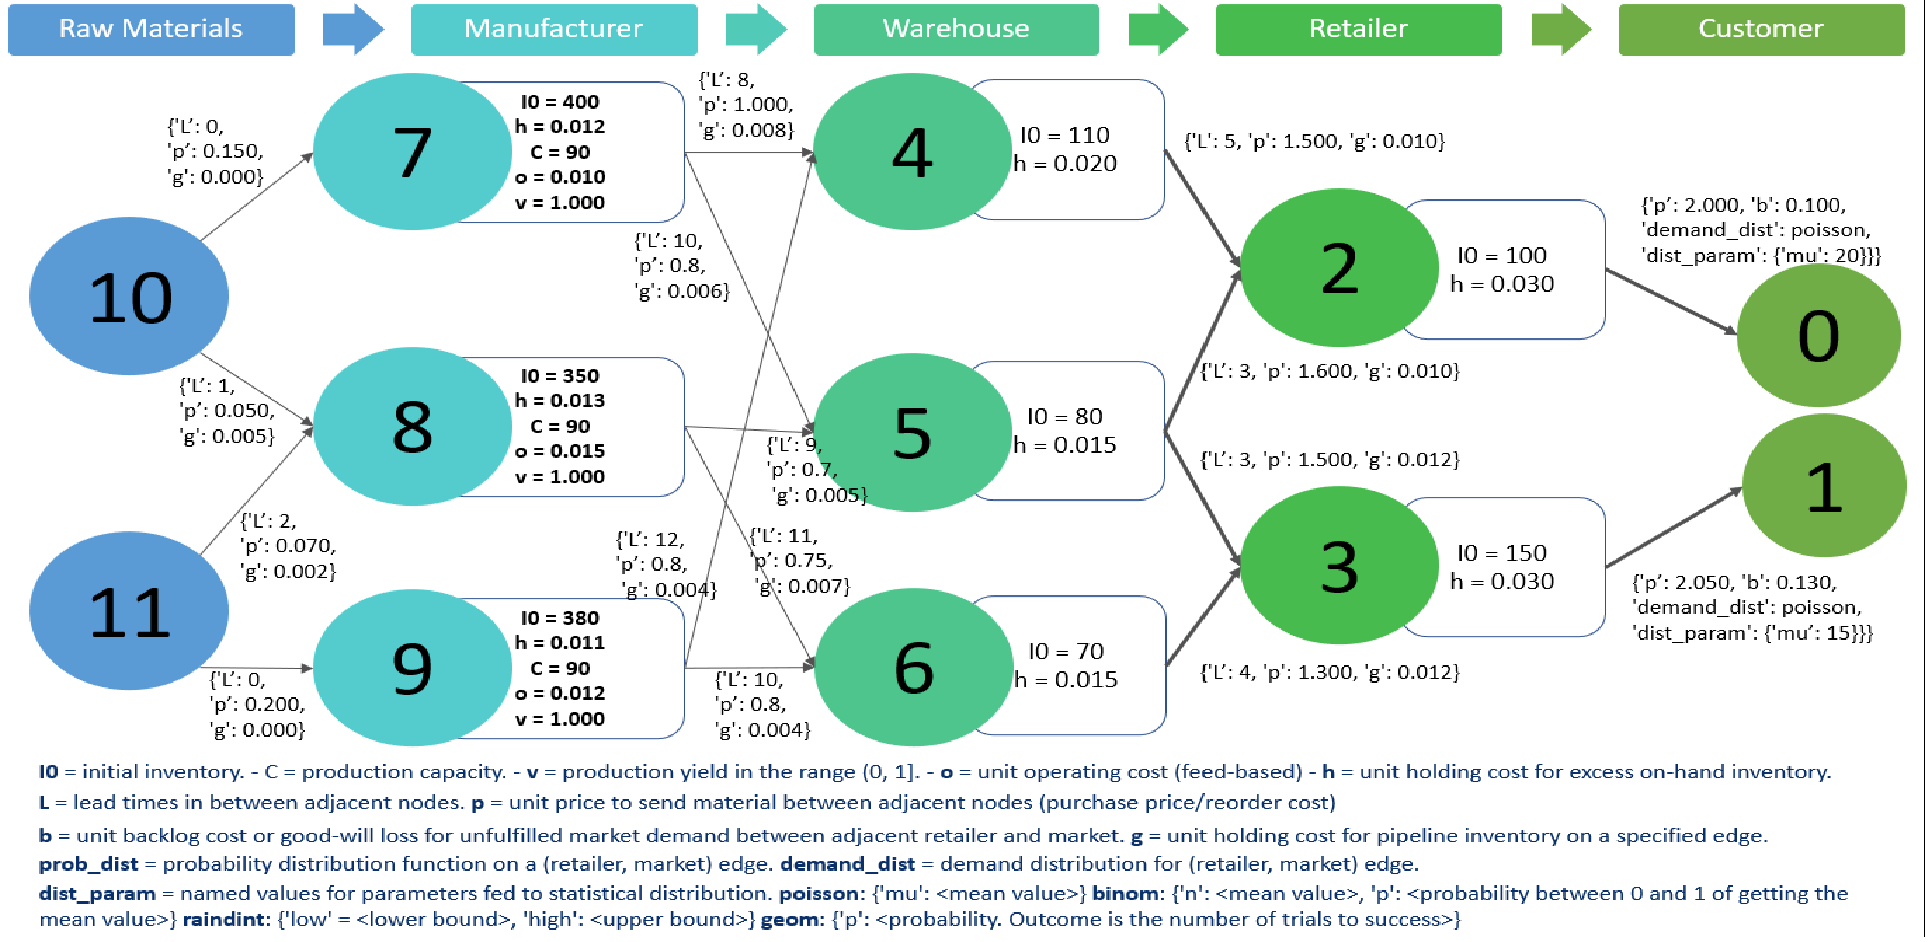

In [ ]:
from scipy.stats import poisson

In [ ]:
# create graph
graph = nx.DiGraph()
# Market 
graph.add_nodes_from([0])
graph.add_nodes_from([1])
# Retailer
graph.add_nodes_from([2], I0 = 100,
                                h = 0.030)
graph.add_nodes_from([3], I0 = 150,
                                h = 0.030)

# Distributors
graph.add_nodes_from([4], I0 = 110,
                                h = 0.020)
graph.add_nodes_from([5], I0 = 80,
                                h = 0.015)
graph.add_nodes_from([6], I0 = 70,
                                h = 0.015)


# Manufacturers
graph.add_nodes_from([7], I0 = 400,
                                C = 90,
                                o = 0.010,
                                v = 1.000,
                                h = 0.012)
graph.add_nodes_from([8], I0 = 350,
                                C = 90,
                                o = 0.015,
                                v = 1.000,
                                h = 0.013)
graph.add_nodes_from([9], I0 = 380,
                                C = 80,
                                o = 0.012,
                                v = 1.000,
                                h = 0.011)
# Raw materials
graph.add_nodes_from([10, 11])

## Links
# Links
graph.add_edges_from([(2,0,{'p': 2.000,
                                 'b': 0.100,
                                 'demand_dist': poisson,
                                 'dist_param': {'mu': 20}}),
                           (3,1,{'p': 2.050,
                                 'b': 0.130,
                                 'demand_dist': poisson,
                                 'dist_param': {'mu': 15}}),
                           (4,2,{'L': 5,
                                 'p': 1.500,
                                 'g': 0.010}),
                           (5,2,{'L': 3,
                                 'p': 1.600,
                                 'g': 0.010}),
                           (5,3,{'L': 3,
                                 'p': 1.500,
                                 'g': 0.012}),
                           (6,3,{'L': 4,
                                 'p': 1.300,
                                 'g': 0.012}),
                           (7,4,{'L': 8,
                                 'p': 1.000,
                                 'g': 0.008}),
                           (7,5,{'L': 10,
                                 'p': 0.800,
                                 'g': 0.006}),
                           (8,5,{'L': 9,
                                 'p': 0.700,
                                 'g': 0.005}),
                           (8,6,{'L': 11,
                                 'p': 0.750,
                                 'g': 0.007}),
                           (9,4,{'L': 12,
                                 'p': 0.800,
                                 'g': 0.004}),
                           (9,6,{'L': 10,
                                 'p': 0.800,
                                 'g': 0.004}),
                           (10,7,{'L': 0,
                                 'p': 0.150,
                                 'g': 0.000}),
                           (10,8,{'L': 1,
                                 'p': 0.050,
                                 'g': 0.005}),
                           (11,8,{'L': 2,
                                 'p': 0.070,
                                 'g': 0.002}),
                           (11,9,{'L': 0,
                                 'p': 0.200,
                                 'g': 0.000})])

In [ ]:
_max_rewards = 2000
num_periods = 20
backlog = False
alpha = 1.00
seed_int = 0
user_D = {(2,0): np.zeros(num_periods),(3,1): np.zeros(num_periods)}
sample_path = {(2,0): False,(3,1): False}
_max_rewards = 2000
retailer_array=np.array([2,3])

In [ ]:
# # Save user_D and sample_path to graph metadata
# for link in user_D.keys():
#     d = user_D[link]
#     if np.sum(d) != 0:
#         graph.edges[link]['user_D'] = d
#         if link in sample_path.keys():
#             graph.edges[link]['sample_path'] = sample_path[link]
#     else:
#         # Placeholder to avoid key errors
#         graph.edges[link]['user_D'] = 0

In [ ]:
# graph.edges[(3,1)]

In [ ]:
# market = [j for j in graph.nodes() if len(list(graph.successors(j))) == 0]
# distrib = [j for j in graph.nodes() if 'C' not in graph.nodes[j] and 'I0' in graph.nodes[j]]
# retail = [j for j in graph.nodes() if len(set.intersection(set(graph.successors(j)), set(market))) > 0]

In [ ]:
# graph.has_edge(3,0)

In [ ]:
# for j in retail:
#     for k in market:
#         print(j,k)
#         if graph.has_edge(j,k):
#             print('Has edge')
#             Demand = graph.edges[(j,k)]['user_D']
        

In [ ]:
CHECKPOINT_ROOT = r"C:\Users\kishore.kukreja\Desktop\Inventory Policy Two Echelon\multi-echelon-RL\model\networkmanagementv1\userdefined\lostsales"

In [ ]:
ray.shutdown()
ray.init(ignore_reinit_error=True,local_mode=True)

In [ ]:
import os
import shutil
if not os.path.exists(CHECKPOINT_ROOT):
    os.makedirs(CHECKPOINT_ROOT)

In [ ]:
config = ppo.DEFAULT_CONFIG.copy()
config
config["log_level"] = "DEBUG"

In [ ]:
select_env = "NetworkManagement-v2" #NetworkManagement-v1 #NetworkManagement-v2 #SupplyChainEnv-v0

In [ ]:
env_config = {'num_periods': num_periods,
              '_max_rewards': _max_rewards,
              'alpha': alpha,
              'seed_int': seed_int,
              'backlog': backlog,
              'user_D': user_D,
              'sample_path': sample_path,
              'graph':graph}
env_config

In [ ]:
case=NetInvMgmtMasterEnv()

In [ ]:
register_env(select_env,lambda config :lost_sales_env(case,env_config=env_config))

In [ ]:
agent = ppo.PPOTrainer(config, env=select_env)

In [ ]:
N_ITER=1 ## Increase later
results=[]
for n in range(N_ITER):
    result = agent.train()
    results.append(result)
    file_name = agent.save(CHECKPOINT_ROOT)
    print(file_name)
    print(result)

In [ ]:
# Unpack values from each iteration
rewards = np.hstack([i['hist_stats']['episode_reward'] 
    for i in results])
# pol_loss = [
#     i['info']['learner']['default_policy']['policy_loss'] 
#     for i in results]
# vf_loss = [
#     i['info']['learner']['default_policy']['vf_loss'] 
#     for i in results]

In [ ]:
p = 100
mean_rewards = np.array([np.mean(rewards[i-p:i+1]) 
                if i >= p else np.mean(rewards[:i+1]) 
                for i, _ in enumerate(rewards)])
std_rewards = np.array([np.std(rewards[i-p:i+1])
               if i >= p else np.std(rewards[:i+1])
               for i, _ in enumerate(rewards)])

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(20, 10))
gs = fig.add_gridspec(2, 4)
ax0 = fig.add_subplot(gs[:, :-2])
ax0.fill_between(np.arange(len(mean_rewards)), 
                 mean_rewards - std_rewards, 
                 mean_rewards + std_rewards, 
                 label='Standard Deviation', alpha=0.3)
ax0.plot(mean_rewards, label='Mean Rewards')
ax0.set_ylabel('Rewards')
ax0.set_xlabel('Episode')
ax0.set_title('Training Rewards')
ax0.legend()

### Next Steps

In [ ]:
## get all creative and try to change user_D to be the same length as the num of periods 
##                                and sample_path - True to saple from this disctribution instead of a fixed distribution

In [ ]:
## Try to do this fro backlog sales i.e. back order sales orders

In [ ]:
## increase the number of iteartions and retrain to achieve a better model

In [ ]:
## Load model from checkpoint and do the inference